# 基础概念

国内商品期货主力合约一般都是以 1、5、9 月为主，根据主力合约的价差结构一般可以相对确定跨期套利的方向。例如，单纯从市场结构的角度来讲，正向市场比较适合做反套，而反向市场比较适合做正套。但是鸡蛋这个品种比较例外，因为它的节假日效应非常明显，从而导致需求的弹性非常大，套利的模式相对固定。最常规的做法是：JD01-05 正套、JD05-09 反套、JD09-01 正套。

In [1]:
# coding=utf-8
import sys
import datetime as dt

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook

import QuantStudio.api as QS
WDB = QS.FactorDB.WindDB2()

In [2]:
# 参数设置和数据准备
IDs = ["JD01M.DCE", "JD05M.DCE", "JD09M.DCE"]# 鸡蛋连续月合约
StartDT = dt.datetime(2014, 1, 1)# 回测开始日期
EndDT = dt.datetime(2018, 12, 31)# 回测截止日期
PriceFactor = "收盘价(元)"

WDB.connect()
DTs = WDB.getTable("中国期货交易日历").getDateTime(iid="DCE", start_dt=StartDT, end_dt=EndDT)
FT = WDB.getTable("中国商品期货日行情")
CPrice = FT.readData(factor_names=[PriceFactor], ids=IDs, dts=DTs).iloc[0]

## 鸡蛋 01-05 正套

鸡蛋 01-05 正套的主要逻辑在于，05 合约是鸡蛋三大主力合约当中最弱的一个合约，因为 3、4 月份气温基本保持在 15-20 度，这个温度恰好是蛋鸡产蛋最舒服的季节，产能率比较高，供应端压力较大；与此同时，春节备货之后，下游需求开始骤降，所以需求端急速下滑，整体上鸡蛋 05 合约供需两端都是偏空一些，从而使其成为年内最弱的一个主力合约。对于 01 合约而言，由于元旦、春节的备货需求，所以需求端比 05 合约好一些，所以相对而言，鸡蛋 15 合约比较适合做正套。

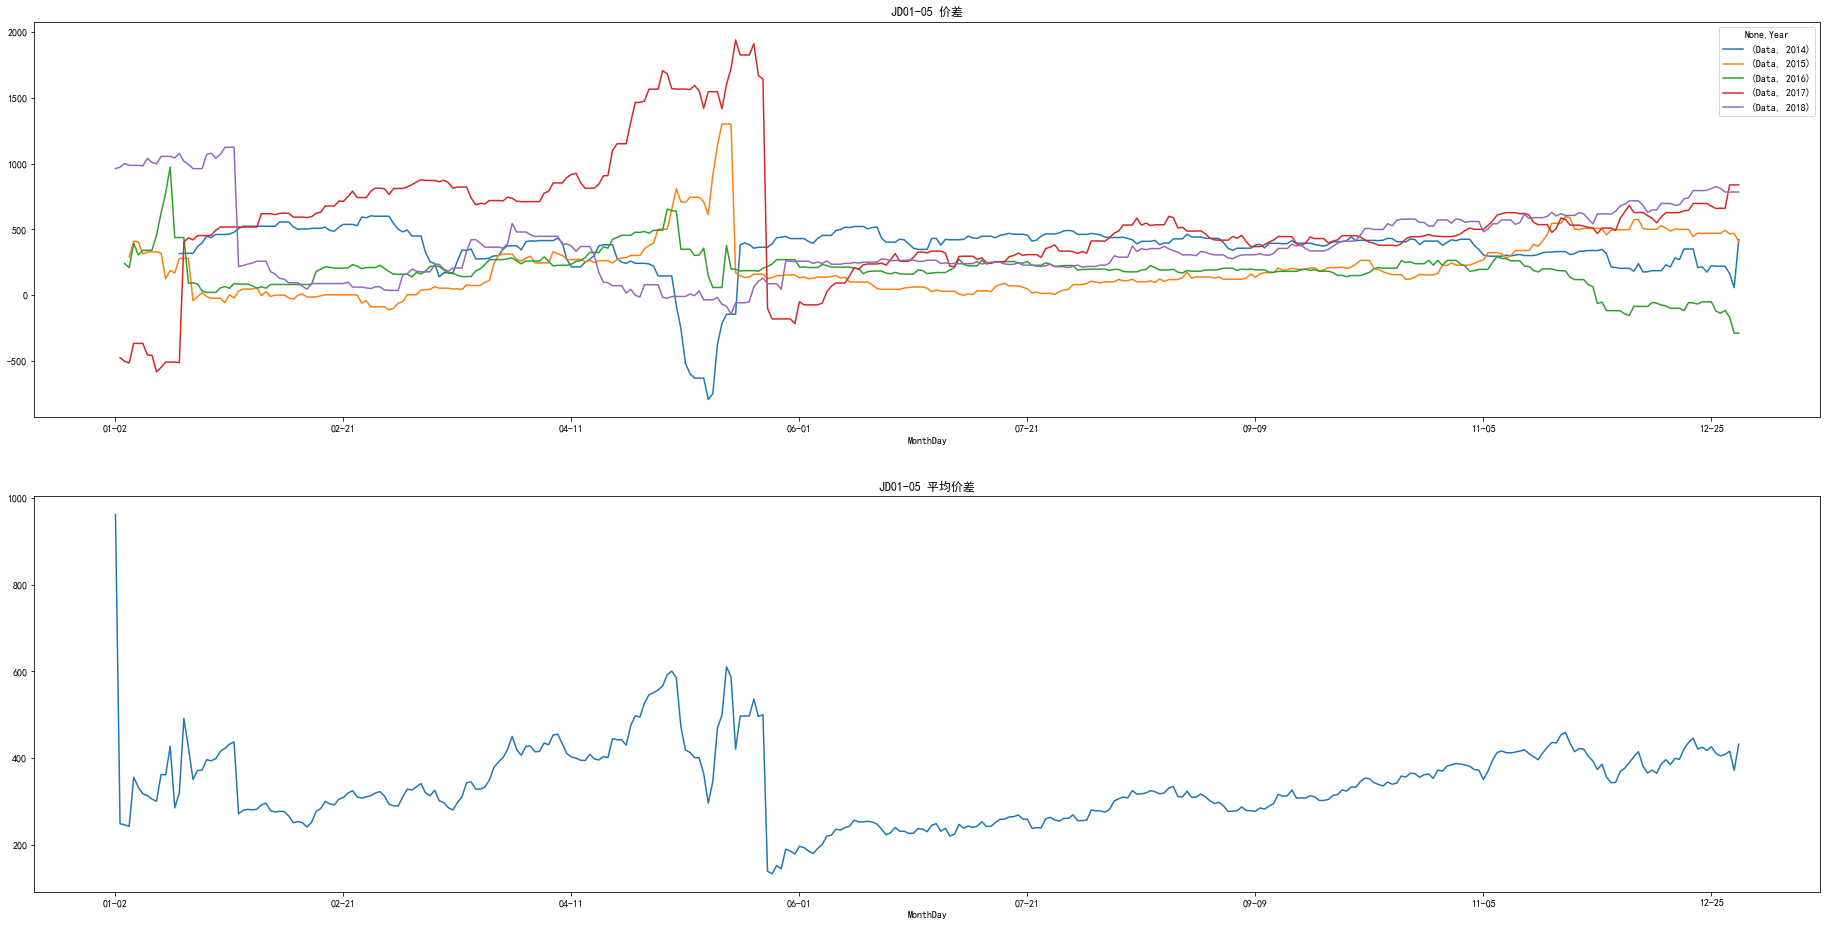

In [14]:
# JD 01-05 Spread
JD15Spread = CPrice["JD01M.DCE"] - CPrice["JD05M.DCE"]

JD15SpreadGBY = QS.Tools.DateTime.groupbyYear(JD15Spread).fillna(method="ffill")

Fig, Axes = plt.subplots(2, 1, figsize=(32, 16))
JD15SpreadGBY.plot(kind="line", ax=Axes[0], title="JD01-05 价差")
xTicks = Axes[0].get_xticks().astype(np.int)
xTickLabels = np.full(shape=xTicks.shape, fill_value="", dtype="O")
Mask = ((xTicks>=0) & (xTicks<JD15SpreadGBY.shape[0]))
xTickLabels[Mask] = JD15SpreadGBY.index.values[xTicks[Mask].tolist()]
Axes[0].set_xticklabels(xTickLabels)
JD15SpreadGBY.mean(axis=1).plot(kind="line", ax=Axes[1], title="JD01-05 平均价差")
Axes[1].set_xticklabels(xTickLabels);

持有期限：6月-12月：

6月：震荡行情。备货需求结束，产蛋率逐渐开始下降，蛋价震荡调整。

7月：震荡或正套行情。蛋鸡产蛋率下降 20%，供应有所下降，需求端中秋备货需求增加，近月合约价格相对强势，正套行情往往开始启动。

8月：正套行情。学生开学，国庆备货，需求增加，近月合约价格相对强势，容易走正套。

9月：震荡行情。中秋备货需求结束，需求开始有所下滑，行情偏震荡。

10月：正套行情。国庆备货需求结束，需求高位回落，气温降低，产蛋率低位回升，行情偏震荡，有时也容易走正套。

11月：正套或震荡行情。供需两端边际变化都不大，行情偏震荡一些，也有可能走正套。

12月：正套或震荡行情。元旦节假日备货需求，并不是每年都有，所以有时震荡，无时震荡。

总结：JD01-05 正套最佳的入场时机在 7 月份，在 12 月份高点选择离场。

## 鸡蛋 05-09 反套

鸡蛋 09 合约是三大主力合约当中最强的一个合约，从供应端来讲，7 月底是三伏天，天气炎热，蛋鸡的产蛋率会下降大约 20% 左右，所以供应端出现供应减少的情况，供应端利多。从需求端来看，农历八月十五中秋节备货，再加上高校开学备货需求，所以需求端也是利多的，需求突然大幅增加。供需两端发力，所以09 合约是年内最强的一个合约，价格一般都是最高的。所以鸡蛋 05-09 合约适合做反套。

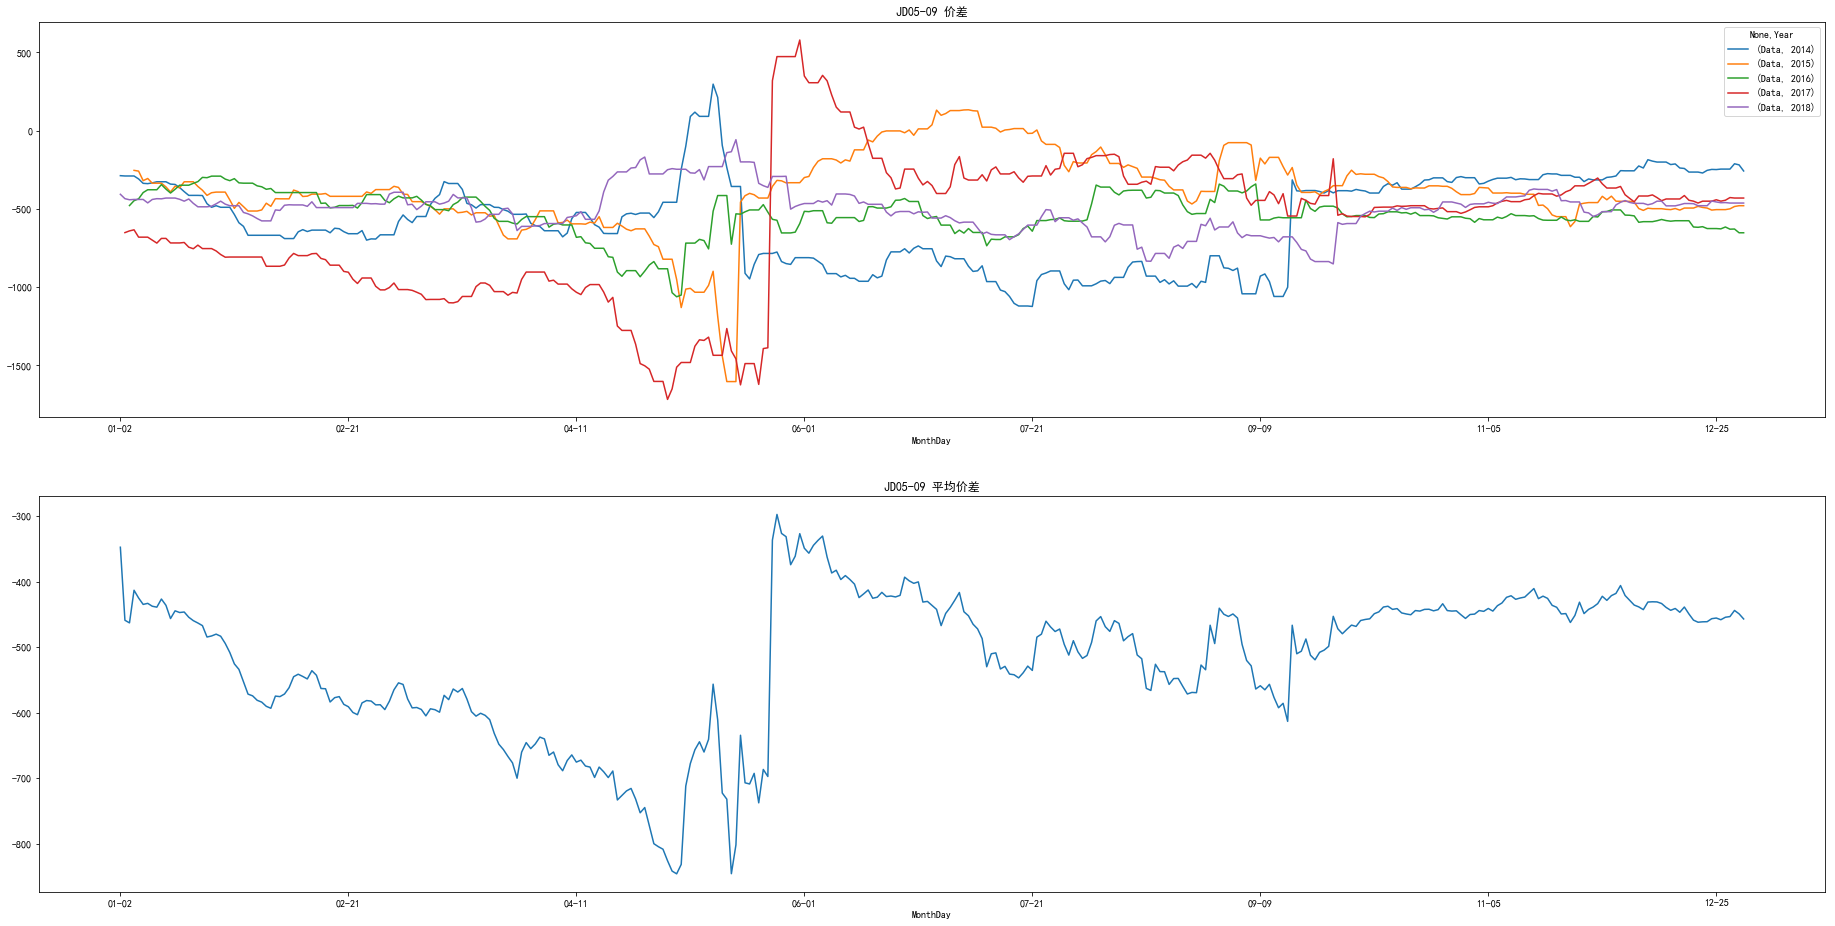

In [15]:
# JD 05-09 Spread
JD15Spread = CPrice["JD05M.DCE"] - CPrice["JD09M.DCE"]

JD15SpreadGBY = QS.Tools.DateTime.groupbyYear(JD15Spread).fillna(method="ffill")

Fig, Axes = plt.subplots(2, 1, figsize=(32, 16))
JD15SpreadGBY.plot(kind="line", ax=Axes[0], title="JD05-09 价差")
xTicks = Axes[0].get_xticks().astype(np.int)
xTickLabels = np.full(shape=xTicks.shape, fill_value="", dtype="O")
Mask = ((xTicks>=0) & (xTicks<JD15SpreadGBY.shape[0]))
xTickLabels[Mask] = JD15SpreadGBY.index.values[xTicks[Mask].tolist()]
Axes[0].set_xticklabels(xTickLabels)
JD15SpreadGBY.mean(axis=1).plot(kind="line", ax=Axes[1], title="JD05-09 平均价差")
Axes[1].set_xticklabels(xTickLabels);

持有期限：10月-次年4月：

10月：震荡行情。国庆备货需求结束，需求高位回落，气温降低，产蛋率低位回升，行情偏震荡。

11月：震荡或反套行情。供需两端边际变化都不大，行情偏震荡一些，也有可能走反套。

12月：正套或震荡行情。元旦前的节假日备货，近月 05 合约相对强势。

1月：反套行情。元旦备货需求结束，近月 05 合约相对较弱。

2月：震荡行情。春节放假，期货市场资金不活跃，价差走势偏震荡。

3月：反套行情。气温15-20度，产蛋率高，需求断层，近月05合约相对较弱。

4月：反套行情。临近交割，空头交货，投机多头开始移仓，近月05合约多头减仓下跌，远月09合约增仓上涨，容易发生移仓行情。

总结：JD05-09 反套最好的入场时机在 12 月，在 4 月份低点选择离场。

## 鸡蛋 09-01 正套

鸡蛋三大主力合约的强弱程度排序依次是：09 合约强于 01 合约，01 合约强于 05 合约。01 合约有时候会有春节行情，但是也需要看当时的存栏与需求数据，并不是每年都会发生春节行情，而 09 合约每年都会发生中秋行情。所以就鸡蛋 09-01 合约来说，比较适合做正套。

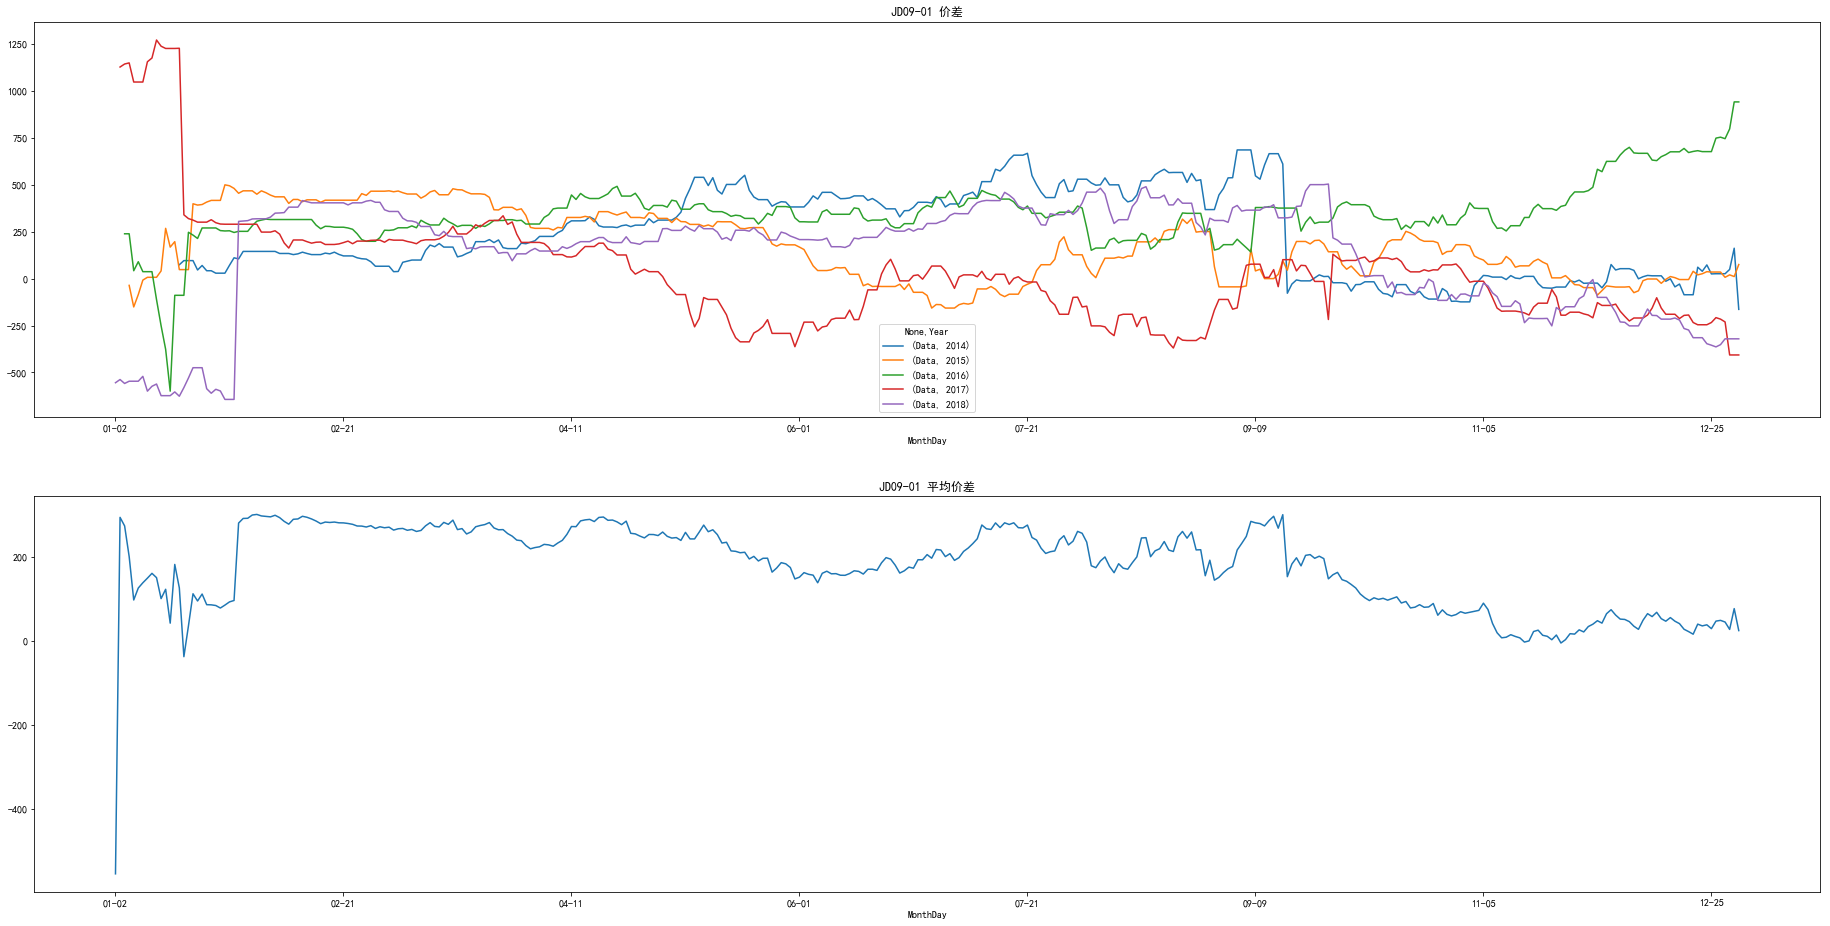

In [16]:
# JD 09-01 Spread
JD15Spread = CPrice["JD09M.DCE"] - CPrice["JD01M.DCE"]

JD15SpreadGBY = QS.Tools.DateTime.groupbyYear(JD15Spread).fillna(method="ffill")

Fig, Axes = plt.subplots(2, 1, figsize=(32, 16))
JD15SpreadGBY.plot(kind="line", ax=Axes[0], title="JD09-01 价差")
xTicks = Axes[0].get_xticks().astype(np.int)
xTickLabels = np.full(shape=xTicks.shape, fill_value="", dtype="O")
Mask = ((xTicks>=0) & (xTicks<JD15SpreadGBY.shape[0]))
xTickLabels[Mask] = JD15SpreadGBY.index.values[xTicks[Mask].tolist()]
Axes[0].set_xticklabels(xTickLabels)
JD15SpreadGBY.mean(axis=1).plot(kind="line", ax=Axes[1], title="JD09-01 平均价差")
Axes[1].set_xticklabels(xTickLabels);

持有期限：2月-8月：

2月：震荡行情。春节放假期间，期货市场交易不活跃，价差走势震荡。

3月：震荡或反套行情。气温在 15-20 度，产蛋率较高，供应增加，需求面临下降，近月 09 合约震荡偏弱。

4月：正套行情。清明五一节日备货需求行情，现货价格坚挺，近月 09 合约价格相对强势。

5月：震荡行情。五一备货需求结束，端午备货需求相对不明显，近月 09 合约震荡调整。

6月：震荡或反套行情。备货需求结束，产蛋率逐渐开始下降，蛋价震荡调整。

7月：正套行情。蛋鸡产蛋率下降 20%，供应有所下降，需求端中秋备货需求增加，近月09合约价格相对强势。

8月：正套行情。学生开学，国庆备货，需求增加，近月 09 合约价格相对强势。

总结：JD 09-01 正套最好的入场时机在 3 月底，在 7、8 月份高点选择离场。

佛家讲得因缘和合的道理，内因+外缘=结果，两个人吃了同样的东西，然后同样淋了一场大雨，结果一个人没事，而另一个人重病。这两个人所遭受的外缘是相同的，但两个人的体质，即内因不同，所以最终的结果也是完全不同的。单纯的统计套利它只注重了外缘，而忽略了内容，所以基于统计套利得出的结果并不可靠。

相同的原因在相同的条件下才有可能出现相同的结果，在做跨期套利的时候，统计价差或者比值可以参考一下，处于历史的那个位置，以及价差的变化趋势，这些都是外缘；另外，我们还需要去寻找内因，看一下当下的在产蛋鸡存栏量、补栏量、养殖利润、期现结构等和过去走出预期结果的时候是否一样，即寻找相似的内因。外缘相似，内因也相似了，最终的结果才更有可能像我们预期的那样。统计的表象只是外缘，而基本面分析才是内因。



# References

1. 知乎，套利那些事儿系列 16：鸡蛋的跨期套利技巧